# This notebook explores the Seismic Dataset

##  1. Instantiating the datamodule object and preparing the data

In [1]:
# Instanciate SeismicDataModule
from data_modules.seismic import F3SeismicDataModule

# Instantiating the SeismicDataModule with root dir at data/f3
my_data_module = F3SeismicDataModule("data/", dataset_version="f3-ilan")

## 2. Retrieving the training set dataloader (train_dl)

Besides defining the batch size, the data module manages the data loaders for the training, validation, and test partitions. The next command shows how to retrieve the training data loader, i.e., the data loader that provides the training samples.

In [2]:
# Retrieve the training set dataloader (dl)
train_dl = my_data_module.train_dataloader()

## 3. Exploring the training set dataloader (train_dl)


In [3]:
print(f"There are {len(train_dl)} batches in the training set!")
print(f"Each batch contains {len(train_dl.dataset)} samples!")
print(f"Each sample has shape: {train_dl.dataset[0][0].shape}")


There are 28 batches in the training set!
Each batch contains 882 samples!
Each sample has shape: (3, 255, 701)


### 3.1 Inspecting the batch contents

The following code extracts the first batch from the train_dl data loader and inspects its type.

In [4]:
first_batch = next(iter(train_dl))
print("type(first_batch) =", type(first_batch))

type(first_batch) = <class 'list'>


Ok, the batch is a list object. Lets dig a little more and inspect the amount of items in the list.

In [5]:
print("len(first_batch) =", len(first_batch))

len(first_batch) = 2


Ok. It is a list with 2 elements. Let's inspect these elements.

In [6]:
element1 = first_batch[0] # First element
element2 = first_batch[1] # second element

print("type(element1) =", type(element1))
print("type(element2) =", type(element2))

type(element1) = <class 'torch.Tensor'>
type(element2) = <class 'torch.Tensor'>


Both elements are pytorch tensors. Lets see their shape.

In [7]:
print("element1.shape =", element1.shape)
print("element2.shape =", element2.shape)

element1.shape = torch.Size([32, 3, 255, 701])
element2.shape = torch.Size([32, 1, 255, 701])


The first element is a tensor with shape 32 x 3 x 255 x 701. This tensor contains the input features for the samples in the batch. The shape of the tensor indicates that the batch contains 32 samples, each sample has 3 channels, and the size of the images is 255 x 701 pixels.

The data module was initialized with batch size = 32, hence, it is expected that each batch contains 32 elements (OBS: This may not be true for the last batch, in case the total number of samples is not a multiple of 32).

By inspecting the number of elements in the list and the shapes of these elements, we can infer that the batch is organized as a list with two elements, the first one contains the input features (or X) for all samples in the batch while the second one contains the labels for all samples in the batch.

Lets inspect the first sample of the batch, but first, lets give more meaningful names to our variables:

In [8]:
X = first_batch[0]  # Features
y = first_batch[1]  # Labels

X_1 = X[0] # Features of the first sample in the batch
y_1 = y[0] # Label of the first sample in the batch

print("y1: ", y_1)
print("X1: ", X_1)

y1:  tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [4, 4, 4,  ..., 4, 4, 4],
         [4, 4, 4,  ..., 4, 4, 4],
         [4, 4, 4,  ..., 4, 4, 4]]], dtype=torch.uint8)
X1:  tensor([[[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0034,  0.0054,  0.0112,  ...,  0.0008,  0.0018, -0.0024],
         [ 0.0289,  0.0366,  0.0696,  ...,  0.0006,  0.0059, -0.0137],
         ...,
         [ 0.2179,  0.2274,  0.2517,  ..., -0.0878, -0.0483, -0.0502],
         [ 0.2180,  0.2284,  0.2507,  ..., -0.0943, -0.0542, -0.0526],
         [ 0.2180,  0.2284,  0.2507,  ..., -0.0943, -0.0542, -0.0526]],

        [[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0034,  0.0054,  0.0112,  ...,  0.0008,  0.0018, -0.0024],
         [ 0.0289,  0.0366,  0.0696,  ...,  0.0006,  0.0059, -0.0137],
         ...,
         [ 0.2179,  0.2274,  0.2517,  ..., -0.0878, -0.0483, -0.0502],
     

The first element of the batch is the labels for all samples in the batch. Let's inspect the labels for the first sample of the batch.

The label for the first sample is a tensor with shape 1 x 255 x 701. This tensor contains the labels for the first sample in the batch. The shape of the tensor indicates that the sample has 1 channel, and the size of the images is 255 x 701 pixels.

Since the task we are dealing with is a semantic segmentation task, the labels are images with the same size as the input features. The labels are numerical, going from 0 to 6, and represent the class of each pixel in the image.

The second element is the input features for all samples in the batch. Let's inspect the first sample of the batch.

The second sample is a tensor with shape 3 x 255 x 701. This tensor contains the input features for the first sample in the batch. The shape of the tensor indicates that the sample has 3 channels, and the size of the images is 255 x 701 pixels.

### 3.2 Inspecting the number of samples and batches

In [9]:
print(f"The train_dl contains a total of {len(train_dl.dataset)} samples!")
print(f" - These samples are organized in {len(train_dl)} batches!")
print(f" - Each batch contain {train_dl.batch_size} samples!")


The train_dl contains a total of 882 samples!
 - These samples are organized in 28 batches!
 - Each batch contain 32 samples!


In [10]:
for idx, batch in enumerate(train_dl):
    print(f"-- Batch {idx} --")
    X, y = batch
    print("X.shape =", X.shape)
    print("y.shape =", y.shape)
    # Stop after 5 batches for brevity
    if idx == 4:
        break

-- Batch 0 --
X.shape = torch.Size([32, 3, 255, 701])
y.shape = torch.Size([32, 1, 255, 701])
-- Batch 1 --
X.shape = torch.Size([32, 3, 255, 701])
y.shape = torch.Size([32, 1, 255, 701])
-- Batch 2 --
X.shape = torch.Size([32, 3, 255, 701])
y.shape = torch.Size([32, 1, 255, 701])
-- Batch 3 --
X.shape = torch.Size([32, 3, 255, 701])
y.shape = torch.Size([32, 1, 255, 701])
-- Batch 4 --
X.shape = torch.Size([32, 3, 255, 701])
y.shape = torch.Size([32, 1, 255, 701])


## 4. Plotting the data with matplotlib

Lets Visualize the seismic data using matplotlib

### 4.1 Visualizing the training set

#### Visualizing an inline 

As seen in the previous section, the training set is composed of 32 samples. Let's visualize the first sample in the training set.

The first sample in the training set is composed of two images: the input features and the labels. The input features are images with 3 channels, and the labels are images with 1 channel. The images have the same size: 255 x 701 pixels.

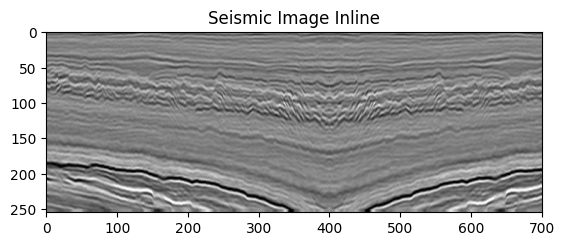

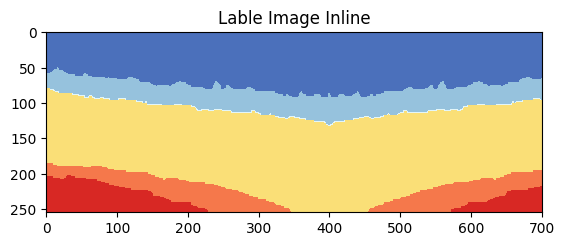

In [11]:
# Data Visualization
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Define a custom colormap for the labels, this is the official colormap for the dataset
label_cmap = ListedColormap(
    [
        [0.29411764705882354, 0.4392156862745098, 0.7333333333333333],
        [0.5882352941176471, 0.7607843137254902, 0.8666666666666667],
        [0.8901960784313725, 0.9647058823529412, 0.9764705882352941],
        [0.9803921568627451, 0.8745098039215686, 0.4666666666666667],
        [0.9607843137254902, 0.47058823529411764, 0.29411764705882354],
        [0.8470588235294118, 0.1568627450980392, 0.1411764705882353],
    ]
)

sample = train_dl.dataset[0][0]
plt.imshow(sample[0], cmap="gray") # You may try with other color maps: seismic, inferno
plt.title("Seismic Image Inline")
plt.show()

sample = train_dl.dataset[0][1]
plt.imshow(sample[0], cmap=label_cmap)
plt.title("Lable Image Inline")
plt.show()



A more compact plot

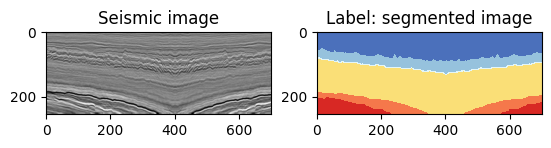

In [12]:
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(train_dl.dataset[0][0][0], cmap="gray")
plt.title("Seismic image")
plt.subplot(1, 2, 2)
plt.imshow(train_dl.dataset[0][1][0], cmap=label_cmap)
plt.title("Label: segmented image")
plt.show()

In [13]:
def show_img_label(img,label):
    plt.figure()
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap="gray")
    plt.title("Seismic image")
    plt.subplot(1, 2, 2)
    plt.imshow(label, cmap=label_cmap)
    plt.title("Label: segmented image")
    plt.show()

#### Visualizing a crossline

Note that crosslines have a diferent shape from inlines and so need to be padded to be used in the model. The next command shows how to pad a crossline to be used in the model.

The padding method used is reflection padding, which is a technique that pads the input tensor using the reflection of the input boundary. The padding is performed by mirroring the input tensor data around the input boundary. The cyan line in the figure below represents the border between the original data and the padding.



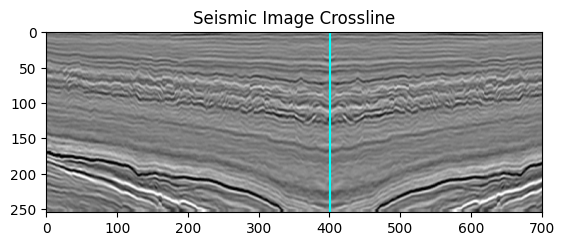

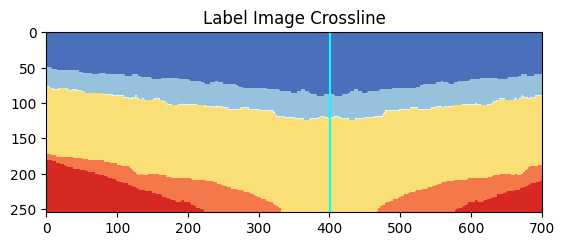

In [14]:
sample = train_dl.dataset[600][0]
plt.imshow(sample[0], cmap="gray")
plt.title("Seismic Image Crossline")
plt.axvline(x=401, color="cyan")
plt.show()

sample = train_dl.dataset[600][1]
plt.imshow(sample[0], cmap=label_cmap)
plt.title("Label Image Crossline")
plt.axvline(x=401, color="cyan")
plt.show()

### 4.2 Visualizing the validation set

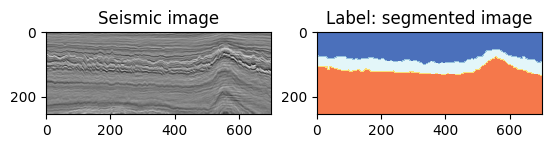

In [15]:
val_dl = my_data_module.val_dataloader()

show_img_label(val_dl.dataset[0][0][0],
               val_dl.dataset[0][1][0])

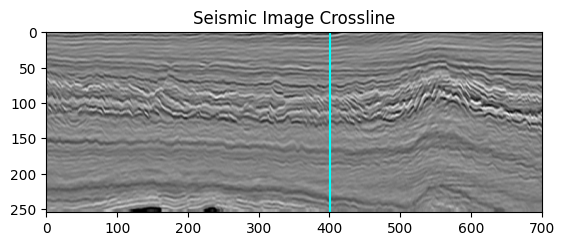

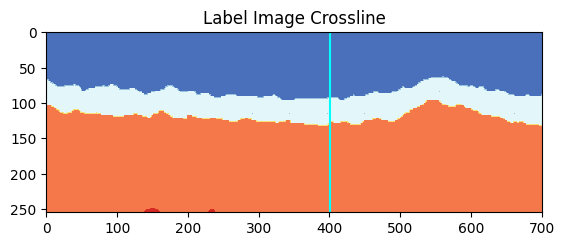

In [16]:
sample = val_dl.dataset[47][0]
plt.imshow(sample[0], cmap="gray")
plt.title("Seismic Image Crossline")
plt.axvline(x=401, color="cyan")
plt.show()

sample = val_dl.dataset[47][1]
plt.imshow(sample[0], cmap=label_cmap)
plt.title("Label Image Crossline")
plt.axvline(x=401, color="cyan")
plt.show()

### 4.3 Visualizing the Test Set

For the test set both the inline and crossline have the same shape as the training set, so no padding is needed.

#### Inline

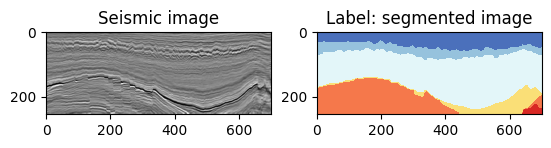

In [17]:
test_dl = my_data_module.test_dataloader()

show_img_label(test_dl.dataset[0][0][0],
               test_dl.dataset[0][1][0])

#### Crossline

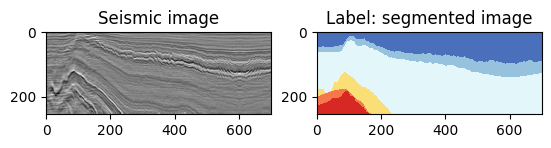

In [18]:
show_img_label(test_dl.dataset[200][0][0],
               test_dl.dataset[200][1][0])

## 5. Retrieving subsets of the datasets and dropping the last batch

You might use the `cap` parameter to limit the amount of samples the dataloader will use from the dataset.

Also, you might configure the dataloader to drop the last batch in case it is smaller than the other (which can be usefull if your training process requires all batches to have the same size).



In [19]:
# Instanciate SeismicDataModule
from data_modules.seismic import F3SeismicDataModule

# Instantiating the SeismicDataModule with root dir at data/f3
data_module = F3SeismicDataModule("data/", batch_size=8)

In [20]:
dataloaders = {}
for cap in [0.01, 0.05, 0.1, 0.2, 0.5, 1.0]:
    print("Generating data loader with {0:.2f}% of data".format(cap*100) )
    dataloaders[cap] = data_module.train_dataloader(cap=cap, drop_last=True)

for cap, dl in dataloaders.items():
    print(f"Dataloader with cap={cap} has {len(dl)} batch(es) and {len(dl.dataset)} sample(s)!")


Generating data loader with 1.00% of data
Generating data loader with 5.00% of data
Generating data loader with 10.00% of data
Generating data loader with 20.00% of data
Generating data loader with 50.00% of data
Generating data loader with 100.00% of data
Dataloader with cap=0.01 has 1 batch(es) and 9 sample(s)!
Dataloader with cap=0.05 has 6 batch(es) and 49 sample(s)!
Dataloader with cap=0.1 has 12 batch(es) and 99 sample(s)!
Dataloader with cap=0.2 has 24 batch(es) and 198 sample(s)!
Dataloader with cap=0.5 has 62 batch(es) and 496 sample(s)!
Dataloader with cap=1.0 has 124 batch(es) and 992 sample(s)!


The following code shows the first 

Dataloader with cap=0.01 has 1 batch(es) and 9 sample(s)!
x_0.shape = torch.Size([3, 255, 701])
y_0.shape = torch.Size([1, 255, 701])


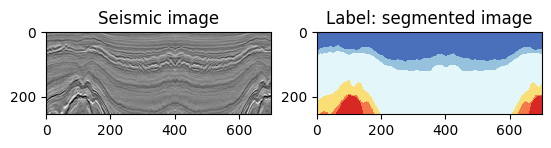

Dataloader with cap=0.05 has 6 batch(es) and 49 sample(s)!
x_0.shape = torch.Size([3, 255, 701])
y_0.shape = torch.Size([1, 255, 701])


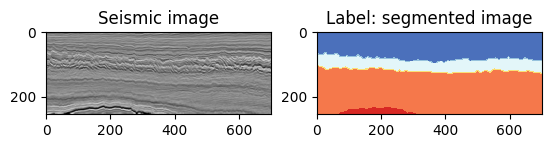

Dataloader with cap=0.1 has 12 batch(es) and 99 sample(s)!
x_0.shape = torch.Size([3, 255, 701])
y_0.shape = torch.Size([1, 255, 701])


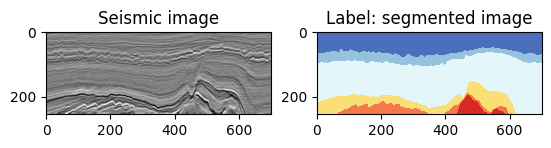

Dataloader with cap=0.2 has 24 batch(es) and 198 sample(s)!
x_0.shape = torch.Size([3, 255, 701])
y_0.shape = torch.Size([1, 255, 701])


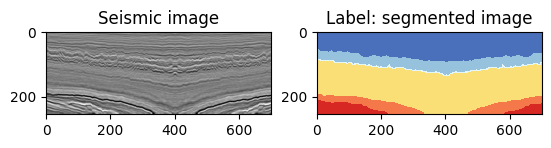

Dataloader with cap=0.5 has 62 batch(es) and 496 sample(s)!
x_0.shape = torch.Size([3, 255, 701])
y_0.shape = torch.Size([1, 255, 701])


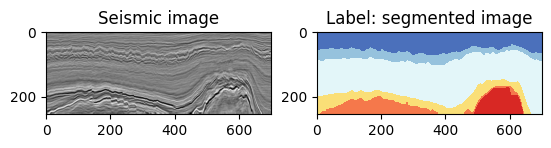

Dataloader with cap=1.0 has 124 batch(es) and 992 sample(s)!
x_0.shape = torch.Size([3, 255, 701])
y_0.shape = torch.Size([1, 255, 701])


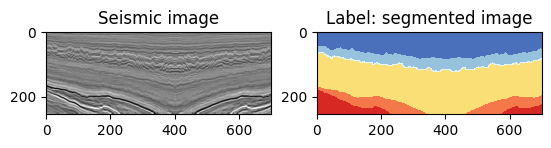

In [21]:
# Data Visualization
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Define a custom colormap for the labels, this is the official colormap for the dataset
label_cmap = ListedColormap(
    [
        [0.29411764705882354, 0.4392156862745098, 0.7333333333333333],
        [0.5882352941176471, 0.7607843137254902, 0.8666666666666667],
        [0.8901960784313725, 0.9647058823529412, 0.9764705882352941],
        [0.9803921568627451, 0.8745098039215686, 0.4666666666666667],
        [0.9607843137254902, 0.47058823529411764, 0.29411764705882354],
        [0.8470588235294118, 0.1568627450980392, 0.1411764705882353],
    ]
)

for cap, dl in dataloaders.items():
    print(f"Dataloader with cap={cap} has {len(dl)} batch(es) and {len(dl.dataset)} sample(s)!")
    for batch in dl:
        X, y = batch
        x_0 = X[0]
        y_0 = y[0]
        print("x_0.shape =", x_0.shape)
        print("y_0.shape =", y_0.shape)
        show_img_label(x_0[0], y_0[0])
        break # Show only the first element of the first batch
